In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Reshape the data 
x_train = np.reshape(x_train, (-1, 28, 28))
x_test = np.reshape(x_test, (-1, 28, 28))


In [6]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train LSTM model
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 24s 43ms/step - loss: 0.5204 - accuracy: 0.8318 - val_loss: 0.1769 - val_accuracy: 0.9439
Epoch 2/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1482 - accuracy: 0.9544 - val_loss: 0.1176 - val_accuracy: 0.9637
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1033 - accuracy: 0.9686 - val_loss: 0.1076 - val_accuracy: 0.9657
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0793 - accuracy: 0.9761 - val_loss: 0.0686 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.0685 - val_accuracy: 0.9786
Epoch 6/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0588 - val_accuracy: 0.9815
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0560 - val_accuracy:

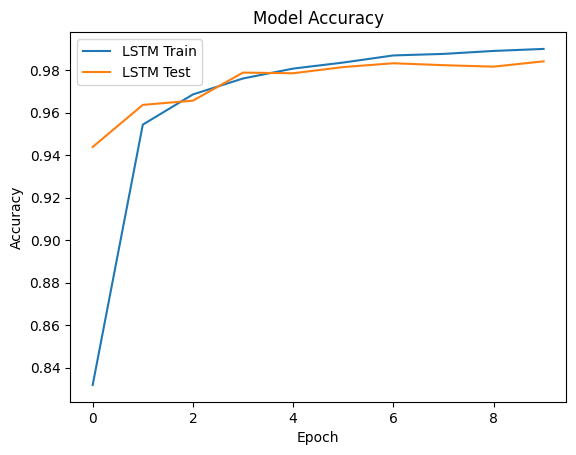

In [8]:
# Plot accuracy
plt.plot(lstm_history.history['accuracy'], label='LSTM Train')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Test')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

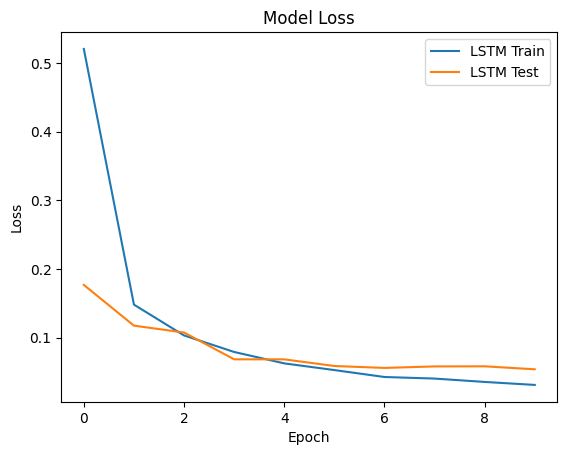

In [9]:


# Plot loss
plt.plot(lstm_history.history['loss'], label='LSTM Train')
plt.plot(lstm_history.history['val_loss'], label='LSTM Test')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
